# Assignment 1: Allstate Claims Severity EDA

In [63]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy
from matplotlib.gridspec import GridSpec


In [2]:
#Reading in data 
trainDf= pd.read_csv("C:/Users/tsgoo/OneDrive/Documents/Northwestern/Practical Machine Learning/Assignment1/train.csv")
testDf= pd.read_csv("C:/Users/tsgoo/OneDrive/Documents/Northwestern/Practical Machine Learning/Assignment1/test.csv")

NameError: name 'pd' is not defined

In [40]:
#Generates Descriptive Statistics
#.describe shows continuous variables
trainDf.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [41]:
#Train data
#A list of attributes and their data types
trainDf.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [42]:
#Train data
#Displaying total number of rows, columns
trainDf.shape

(188318, 132)

In [43]:
#Taking a look atan overview of the Train dataset
print(trainDf.head())
#categorical variables are strings
#use label encoder to change to 1s and 0s
#pearsons correl matrix
#chai squared test (how strong categor values are)

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]


In [44]:
#Taking a look at an overview of the Test dataset
print(testDf.head())

   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
0   4    A    B    A    A    A    A    A    A    B  ...  0.281143  0.466591   
1   6    A    B    A    B    A    A    A    A    B  ...  0.836443  0.482425   
2   9    A    B    A    B    B    A    B    A    B  ...  0.718531  0.212308   
3  12    A    A    A    A    B    A    A    A    A  ...  0.397069  0.369930   
4  15    B    A    A    A    A    B    A    A    A  ...  0.302678  0.398862   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858  0.704052  0.392562  
1  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759  0.453468  0.208045  
2  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676  0.258586  0.297232  
3  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872  0.592264  0.555955  
4  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251  0.301535  0.825823  

[5 rows x 131 columns]


# 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable

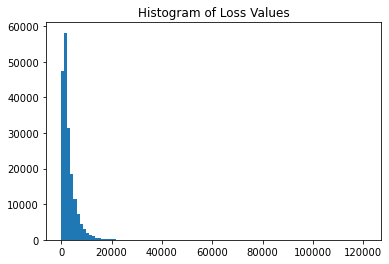

In [77]:
plt.hist(trainDf['loss'], bins = 100)
plt.title("Histogram of Loss Values")
plt.show()
#log transform

In [65]:
print(trainDf['loss'].describe())
print(round(trainDf['loss'].median(), 0))
print(round(trainDf['loss'].mean(), 0))
print(scipy.stats.skew(trainDf['loss']))

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64
2116.0
3037.0
3.7949281496777445


# 2. Investigate missing data and outliers

In [ ]:
#Checking for any missing values in Train set
trainDf.isnull().values.any()

In [ ]:
#Checking for any missing values in Test set
testDf.isnull().values.any()

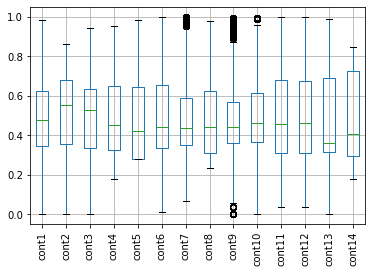

In [57]:
#Boxplots to determine outliers
boxplot = trainDf.boxplot(column=["cont1", "cont2", "cont3", "cont4", "cont5", "cont6", "cont7", "cont8", "cont9", "cont10","cont11", "cont12", "cont13", "cont14"]),plt.xticks(rotation=90)

# 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

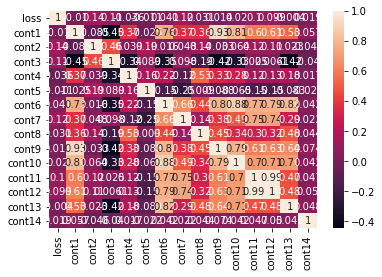

In [79]:
explanatory = trainDf[['loss',"cont1", "cont2", "cont3", "cont4", "cont5", "cont6", "cont7", "cont8", "cont9", "cont10","cont11", "cont12", "cont13", "cont14"]]
sns.heatmap(explanatory.corr(), annot=True)
plt.show()

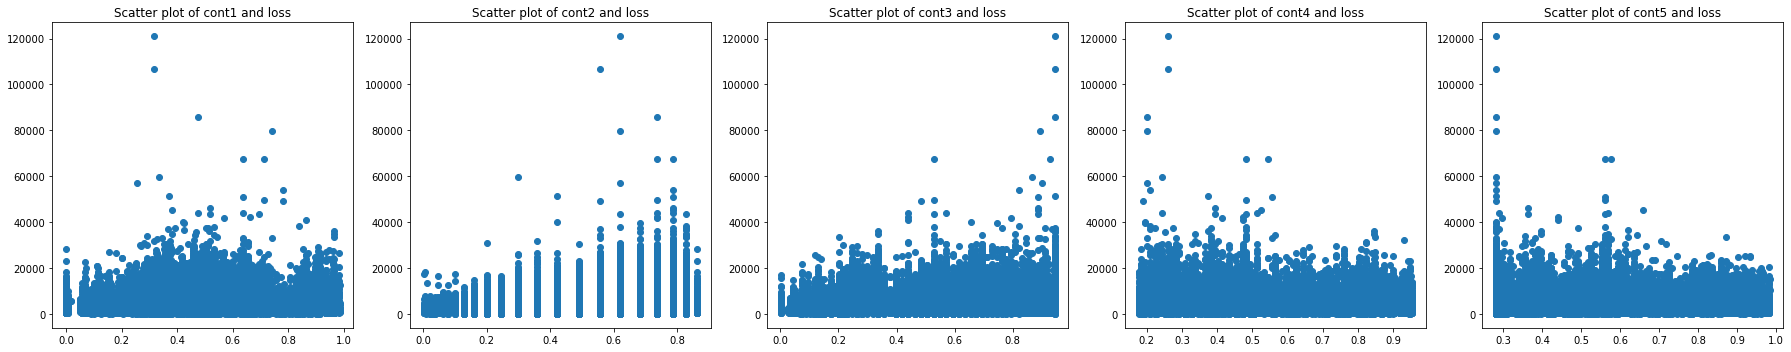

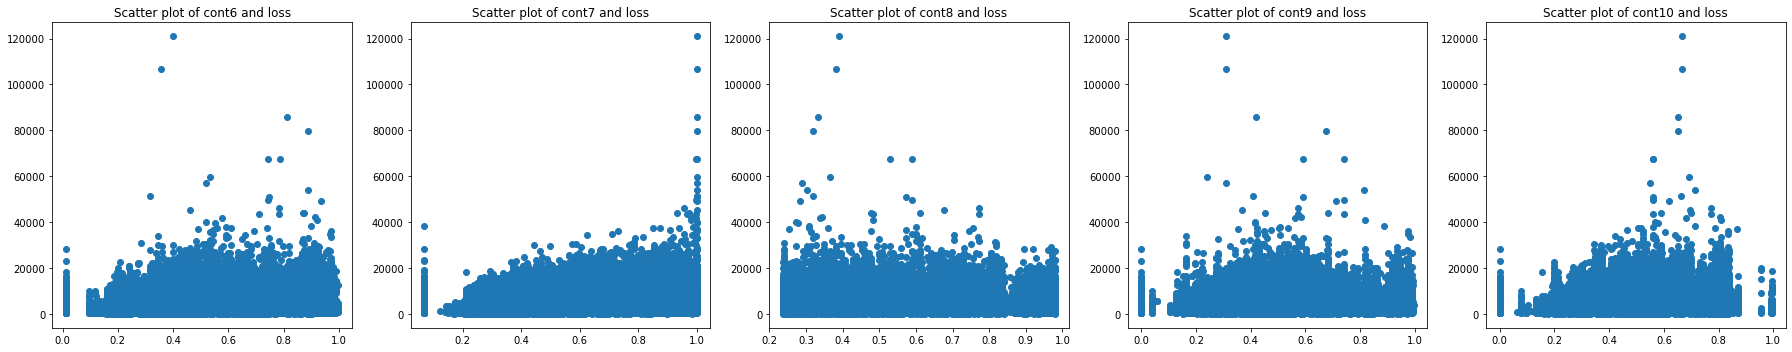

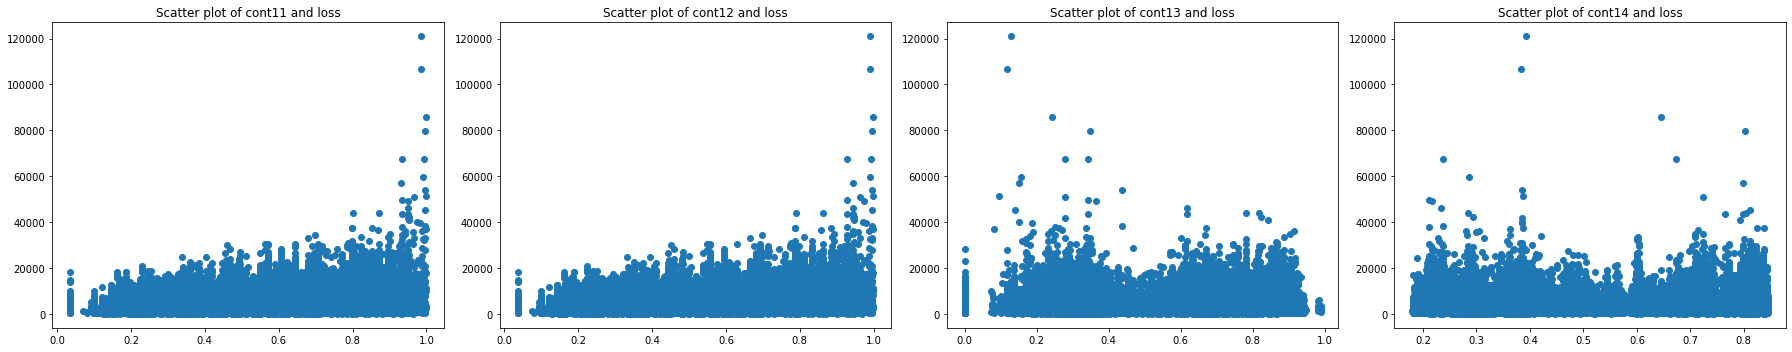

In [86]:
def chart_gen(chart, bucket, col, df, features, target = None):
    COUNT = 0
    fig = plt.figure(figsize=(25, 5))
    gs = GridSpec(nrows=1, ncols=col)

    for i in features:
        ax = fig.add_subplot(gs[0, COUNT])
        ax.scatter(df[i], df[target])
        plt.title("Scatter plot of " + str(i) + " and " + str(target))
        COUNT += 1
        
    fig.tight_layout()
    plt.show()
    
chart_gen('scatter', 0, 5, trainDf, ["cont1", "cont2", "cont3", "cont4", "cont5"], 'loss')
chart_gen('scatter', 0, 5, trainDf, ["cont6", "cont7", "cont8", "cont9", "cont10"], 'loss')
chart_gen('scatter', 0, 4, trainDf, ["cont11", "cont12", "cont13", "cont14"], 'loss')

# 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor

0         0.904805
1         0.774897
2         0.696943
3         0.719043
4         0.452095
            ...   
188313    0.512987
188314    0.689628
188315    0.816148
188316    1.425918
188317    1.465243
Length: 188318, dtype: float64


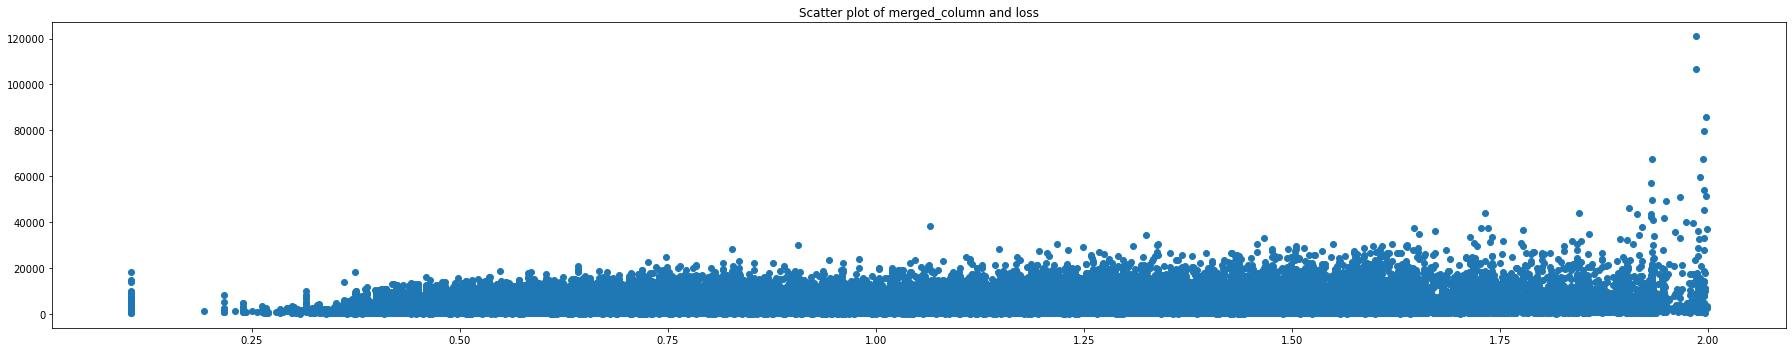

In [100]:
#Merging Cont7 and Cont11 because they have a positive correlation to predicting loss
trainDf["merged_column"] = trainDf["cont7"]+ trainDf["cont11"]
print(merged_column)
chart_gen('scatter', 0, 1, trainDf, ["merged_column"], 'loss')

# 5. Using the dependent variable, perform both min-max and standard scaling in Python

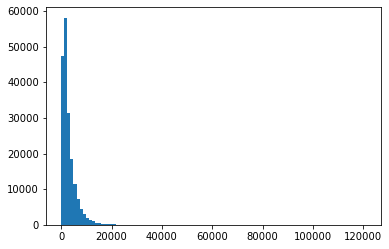

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64


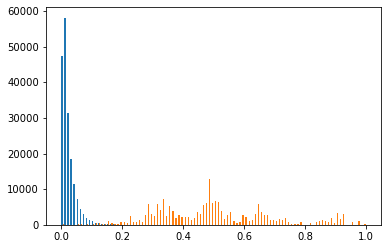

[[0.01828346 0.73737486]
 [0.01060171 0.33554493]
 [0.02482754 0.26582325]
 ...
 [0.04761503 0.49185093]
 [0.01290951 0.4450632 ]
 [0.03926112 0.92111042]]


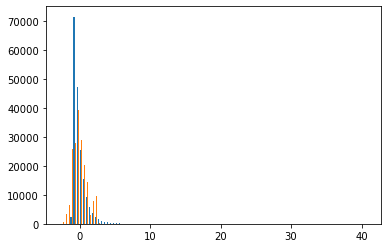

[[-0.28379319  1.23874991]
 [-0.60388784 -0.87053744]
 [-0.01110427 -1.2365208 ]
 ...
 [ 0.93843962 -0.05005532]
 [-0.50772309 -0.2956537 ]
 [ 0.59033608  2.20321544]]


In [104]:
# Min-max scaling
plt.hist(trainDf['loss'], bins = 100)
plt.show()
print(trainDf['loss'])


minmax = MinMaxScaler().fit_transform(trainDf[["loss","cont1"]])
plt.hist(minmax, bins = 100)
plt.show()
print(minmax)

#Standardized Scaling
ss = StandardScaler().fit_transform(trainDf[["loss","cont1"]])
plt.hist(ss, bins = 100)
plt.show()
print(ss)






